# Mathematical building blocks of Neural Networks

## Neural Network on MNIST 

Problem: classify grayscale images of handwritten digits (28 × 28 pixels) into their 10 categories (0 through 9).

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [7]:
from tensorflow.keras import models, layers

### Neural Network Architecture 
This neural network consists of two Dense layers, which are densely connected (fully connected) neural layers. The second layer is a 10-way softmax layer, which will return an array of 10 probabilitiy scores (summing to 1).

In [8]:
network = models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation= 'softmax'))

 ### Compilation
 To train the network 3 more components are required.
 1. loss function
 2. optimizer
 3. Metrics to monitor during training and testing

In [9]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### Preparing image data
Preprocessing the data by reshaping it into the shape the network expects and scaling it so that values are in [0,1] interval.

In [10]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32') / 255

In [11]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Training the Network

In [12]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2582 - accuracy: 0.9254
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1037 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0685 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0493 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0375 - accuracy: 0.9887


In [13]:
test_loss, test_acc = network.evaluate(test_images,test_labels)
print('test_acc: ',test_acc)

313/313 [==============================] - 0s 655us/step - loss: 0.0683 - accuracy: 0.9791
test_acc:  0.9790999889373779


### Accuracy

The gap between the training accuracy and test accuracy is overfitting.

## Tensors

A tensor is a datastrucure for multidimensional data. Matrices are 2D tensors.Tensors are a generalization of matrices to an arbitrary number of dimensions (in context of tensors, a dimension is often called an axis)

In python a multidimensional numpy array is commonly used as tensor.

Key attributes of a Tensor
* Number of axes (rank)
* Shape - dimensions the tensor has along each axis.
* Data type (dtype)


### Scalars (0D tensors)

A tensor that contains only one number is called a scalar. In numpy a float32 or float64 number is a scalar tensor.

In [14]:
import numpy as np

x = np.array(12)
print(x.ndim)

0


### Vectors (1D tensors)
An array of number is called a vector, or 1D tensor.

In [15]:
# This vector has 5 entries and is a 5D vector not a 5D tensor
x = np.array([12, 3, 4, 14, 5])
print(x)
print(x.ndim)

[12  3  4 14  5]
1


### Matrices (2D tensors)
An array of vectors is a matrix, or 2D tensor.

In [16]:
 x = np.array([
    [5, 78, 2, 34, 0],
    [6, 79, 3, 35, 1],
    [7, 80, 4, 36, 2]])
x.ndim

2

### 3D tensors and higher-dimensional tensors
Packing matrices in a new array would give a 3D tensor.
By packing 3D tensor into an array you can create a 4D tensor, and so on.

In [17]:
x = np.array([
    [
        [5, 78, 2, 34, 0],
        [6, 79, 3, 35, 1],
        [7, 80, 4, 36, 2]
    ],
    [
        [5, 78, 2, 34, 0],
        [6, 79, 3, 35, 1],
        [7, 80, 4, 36, 2]],
    [
        [5, 78, 2, 34, 0],
        [6, 79, 3, 35, 1],
        [7, 80, 4, 36, 2]
    ]
])
x.ndim

3

### Example from MNIST

In [18]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [19]:
# 3D tesnsor
train_images.ndim

3

In [20]:
# 60,000 matrices of shape 28x28
train_images.shape

(60000, 28, 28)

In [21]:
train_images[4].shape

(28, 28)

In [22]:
# data type is uint8
train_images[4].dtype

dtype('uint8')

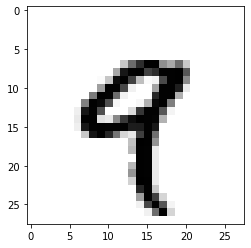

In [23]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Manipulating tensors in Numpy

Selecting a specific element in a tensor is called tensor slicing

In [24]:
train_images[10:100].shape

(90, 28, 28)

In [25]:
train_images[10:100, :, :].shape

(90, 28, 28)

In [26]:
train_images[10:100, 0:28, 0:28].shape

(90, 28, 28)

### Data Batches

In general, the first axis (axis 0) will be the samples axis.

Deep learning models don't process an entire dataset at once, rather they break the data into small batches.

When considering a batch tensor, the first axis (axis 0) is called batch axis.

In [27]:
# This is the first batch
print(train_images[:128].shape)

# This is the second batch
print(train_images[128:256].shape)

(128, 28, 28)
(128, 28, 28)


### Real world examples of tensors

* Vector data - 2D tensors (sampels, features)
* Timeseries data or sequence data - 3D tensors (samples, timesteps, features)
* Images - 4D tensor (samples, height, width, channels) or (samples, channels, height, width)
* Video - 5D tensor (samples, frames, height, width, channels) or (samples, frames, channels, height, width)

## Tensor operations

A keras layer

```python
keras.layers.Dense(512, activation='relu')
```

can be interpreted as a function which takes a 2D tensor and returns another 2D tensor.

```python
output = relu(dot(W, input) + b)
```

W is a 2D tensor and b is a vector both attribute of the layer and relu(x) is max(x, 0)

### Element wise operations

Element wise operations are applied independently to each entry in the tensor being considered.

In numpy these functions are delegated to BLAS(Basic Linear Algebra Subprograms) implemented in Fortran or C.

In [28]:
# A naive python implementation of an element-wise relu operation.
def naive_relu(x):
    assert len(x.shape) == 2
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i,j], 0)
    return x

In [29]:
z = np.maximum(x, 0)

### Broadcasting

When possible, and if there's no ambiguity, the smaller tensor in calculation will be broadcasted to match the shape of the larger tensor. Broadcasting consists of two steps:
1. Axes (broadcast axes) are added to the smaller tensor to match the ndim of larger tensor.
2. The smaller tensor is repeated alongside these new axes to match the full shape of larger tensor.

### Tensor dot

The dot operation, also called a tensor product is the most common and useful tensor operation.

An element wise product is done with the * operation in numpy.
The dot product is done as

```python
import numpy as np
z = np.dot(x, y)
```

As soon as one of the two tensors has an ndim greater than 1, dot is no longer symmetric. dot(x, y) is not same as dot(y, x)

### Tensor reshaping

Reshaping a tensor means rearranging its rows and columns to match a target shape. The reshaped tensor has the same total number of coefficients as the initial tensor.

Transposing is a common reshaping on matrices, which exhanges its rows and columns.

In [30]:
x = np.array([[0.,1.],[2.,3.],[4.,5.]])

In [31]:
x.shape

(3, 2)

In [32]:
x.reshape((6,1))

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [33]:
x.reshape(2,3)

array([[0., 1., 2.],
       [3., 4., 5.]])

In [34]:
x = np.zeros((300,20)) 

In [35]:
np.transpose(x).shape

(20, 300)

## Gradient based optimization

A neural layer tranforms data, where W and b are tensors that are attributes of the layer. They are called weights or trainable parameters of the layer (kernel and bias). These weights contain information learned by network from exposure to training data.

Initially weights are randomly initialized.

```python
output = relu(dot(W, input)+ b)
```

The weights are gradually adjusted based on the feedback signal, this is called training.

Training loop:

1. Draw a batch of training samples x and corresponding targets y.
2. Run the network on x (a step called the forward pass) to obtain predictions y_pred.
3. Compute the loss of the network on the batch, a measure of the mismatch between y_pred and y.
4. Update all weights of the network in a way that slightly reduces the loss on this batch.

Since all the operations in the network are differentiable and the gradient of the loss with regards to the network's coefficient can be evaluated to update the weights. 

Gradient is the derivative of a tensor operation.

### Stochastic gradient descent

Given a differentiable funtion, it's theoretically possible to find its minimum analytically: it's known that a function's minimum is apoint where the derivative is 0.

Applied to neural network, that means finding analytically the combination of weights that yields the smalled possible loss function.

```
gradient(f)(W) =0
```
This is a polynomial equation of N variables, where N is the number of coefficients in the network.

Training loop can we update to:
1. Draw a batch of training samples x and corresponding targets y.
2. Run the network on x (a step called the forward pass) to obtain predictions y_pred.
3. Compute the loss of the network on the batch, a measure of the mismatch between y_pred and y.
4. Compute the gradient of the loss with regard to the network's parameters (a backwards pass).
5. Move the parameters a little in the opposite direction from the gradient for example W-=setp*gradient - thus reducing the loss on the batch a bit.

This is called mini-batch stochastic gradient descent. The term stochastic refers to the fact that each batch is drawn at random.

<img src="img/min.png" >

It is importnat to pick a resonable value for the step factor. If its too small, the descent down the curve will take many iterations, and it could get stuck in a local minimum. If step is too large, updates may end up taking you completely random locations on the curve.

<img src="img/sgd.png" >

There exist multiple variants of SGD that differ by taking into account previous weight updates when computing the next weight update, rather than just looking at the current value of the gradient. There is, for instance, SGD with momentum. Such variants are known as optimizers. Momentum addresses two issues with SGD, convergence speed and local minima.

## Backpropogation

Applying the chain rule to the computation of the gradient values of a neural network gives rise to an algorithm called Backpropogation (reverse-mode differentiation).

Backpropogation starts with the final loss value and works backward from the top layers to the bottom layers, applying the chain rule to compute the contribution that each parameter had in the loss value.

Tensorflow is capable of symbolic differentiation, this means that, fiven a chain of operations with a known derivative, they can compute a gradient function for the chain(by applying the chain rule) that maps network parameter values to gradient values.